In [226]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth',999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)

In [227]:
train = pd.read_excel("C:/Users/sutiwari/Desktop/Area_51/Work_Arena/Python_101/College_Training dataset.xlsx")

In [228]:
train.head()

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,Placed
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,Placed
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,Placed
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,Placed
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,Placed


In [229]:
train.describe(include='all')

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
count,300.000000,289,300.000000,300,290.000000,300,296,300.000000,297,300
unique,NaN,2,NaN,3,NaN,3,3,NaN,7,2
top,NaN,M,NaN,Others,NaN,Others,Commerce,NaN,Management,Placed
freq,NaN,198,NaN,151,NaN,188,165,NaN,126,250
mean,150.500000,NaN,64.724667,NaN,63.953552,NaN,NaN,62.861733,NaN,NaN
std,86.746758,NaN,10.947700,NaN,11.399231,NaN,NaN,8.809468,NaN,NaN
min,1.000000,NaN,37.330000,NaN,40.000000,NaN,NaN,35.500000,NaN,NaN
25%,75.750000,NaN,56.000000,NaN,54.000000,NaN,NaN,57.612500,NaN,NaN
50%,150.500000,NaN,64.250000,NaN,63.000000,NaN,NaN,62.945000,NaN,NaN
75%,225.250000,NaN,74.000000,NaN,73.000000,NaN,NaN,68.422500,NaN,NaN


In [230]:
pd.crosstab(train.Gender,train.Placement)

Placement,Not Placed,Placed
Gender,,
F,19,72
M,31,167


In [231]:
train.Placement = train.Placement.map({"Placed":1,"Not Placed":0})

In [232]:
train.Placement.value_counts()

1    250
0     50
Name: Placement, dtype: int64

In [233]:
train.Gender.value_counts()

M    198
F     91
Name: Gender, dtype: int64

In [234]:
#### outlier detection ####
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [235]:
outlier_Col = detect_outliers(train,2,["Percent_SSC","Percent_HSC","Percent_Degree"])

In [236]:
type(outlier_Col)

list

In [237]:
outlier_Col

[]

In [238]:
## Null Info 
train.isnull().sum()

Student No         0
Gender            11
Percent_SSC        0
Board_SSC          0
Percent_HSC       10
Board_HSC          0
Stream_HSC         4
Percent_Degree     0
Course_Degree      3
Placement          0
dtype: int64

In [239]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
Student No        300 non-null int64
Gender            289 non-null object
Percent_SSC       300 non-null float64
Board_SSC         300 non-null object
Percent_HSC       290 non-null float64
Board_HSC         300 non-null object
Stream_HSC        296 non-null object
Percent_Degree    300 non-null float64
Course_Degree     297 non-null object
Placement         300 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 23.5+ KB


In [240]:
train.describe()

,Student No,Percent_SSC,Percent_HSC,Percent_Degree,Placement
count,300.000000,300.000000,290.000000,300.000000,300.000000
mean,150.500000,64.724667,63.953552,62.861733,0.833333
std,86.746758,10.947700,11.399231,8.809468,0.373301
min,1.000000,37.330000,40.000000,35.500000,0.000000
25%,75.750000,56.000000,54.000000,57.612500,1.000000
50%,150.500000,64.250000,63.000000,62.945000,1.000000
75%,225.250000,74.000000,73.000000,68.422500,1.000000
max,300.000000,87.200000,94.700000,86.700000,1.000000


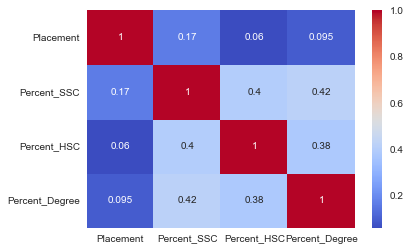

In [241]:
g = sns.heatmap(train[["Placement","Percent_SSC","Percent_HSC","Percent_Degree"]].corr(),annot=True,cmap="coolwarm")

In [242]:
"""It seems interaction between variables are not that high. And no feature has very significant correlation with the target 
variable.We may need to dig deep to come up with features"""

'It seems interaction between variables are not that high. And no feature has very significant correlation with the target \nvariable.We may need to dig deep to come up with features'

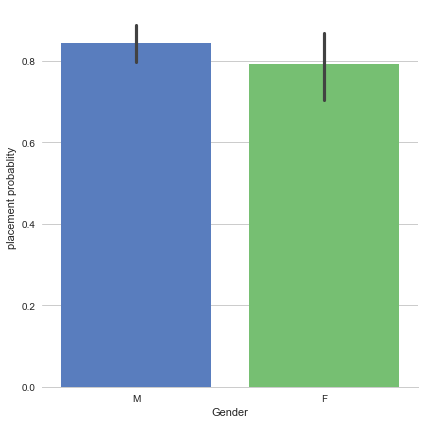

In [243]:
## explore Percent_SSC
g = sns.factorplot(x='Gender',y='Placement',data=train,kind='bar',size=6,palette='muted')
g.despine(left=True)
g = g.set_ylabels("placement probablity")

In [244]:
pd.crosstab(train.Gender,train.Board_SSC)

Board_SSC,CBSE,ICSE,Others
Gender,,,
F,30,17,44
M,61,34,103


In [245]:
pd.crosstab(train.Gender,train.Board_HSC)

Board_HSC,CBSE,ISC,Others
Gender,,,
F,27,9,55
M,48,22,128


In [246]:
train.loc[train['Gender'].isnull() | train.Stream_HSC.isnull()]

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
5,6,NaN,55.00,ICSE,64.00,CBSE,Commerce,50.00,Commerce,1
12,13,M,60.00,Others,52.80,Others,NaN,73.25,Computer Applications,1
33,34,F,75.00,Others,77.00,Others,NaN,73.00,Management,1
34,35,NaN,60.00,CBSE,72.00,CBSE,Commerce,65.00,Management,1
44,45,NaN,54.00,Others,60.00,Others,Commerce,60.00,NaN,1
49,50,NaN,74.50,CBSE,58.00,CBSE,Science,58.00,Management,1
60,61,F,75.00,CBSE,58.00,CBSE,NaN,69.00,Science,1
62,63,NaN,52.00,CBSE,57.00,CBSE,Commerce,47.00,Management,1
70,71,NaN,70.00,Others,50.00,Others,Science,60.00,Management,1
89,90,M,77.00,Others,65.00,Others,NaN,70.00,Science,1


In [247]:
train.Gender = train.Gender.map({"F":0,"M":1,np.nan:3})

In [248]:
train.Board_SSC.unique()

array(['Others', 'ICSE', 'CBSE'], dtype=object)

In [249]:
train.Board_HSC.unique()

array(['Others', 'CBSE', 'ISC'], dtype=object)

In [250]:
#train.Board_HSC = train.Board_HSC.map({"CBSE":1,"ISC":2,"Others":3})

In [251]:
#train.Board_SSC = train.Board_SSC.map({"Others":3,"ICSE":2,"CBSE":1})

In [252]:
train.Board_SSC.unique()

array(['Others', 'ICSE', 'CBSE'], dtype=object)

In [253]:
#g = sns.heatmap(train[["Board_HSC","Board_SSC","Gender","Stream_HSC","Percent_HSC","Percent_SSC"]].corr(),annot=True,cmap="coolwarm")

In [254]:
train.Stream_HSC.unique()

array(['Commerce', 'Science', 'Arts', nan], dtype=object)

In [255]:
#train.Stream_HSC = train.Stream_HSC.map({"Commerce":2,"Science":1,"Arts":3,np.nan:4})

In [256]:
train.Stream_HSC.unique()

array(['Commerce', 'Science', 'Arts', nan], dtype=object)

In [257]:
## Filling the missing value from Gender ##
## Using mode for simillar row including Stream_HSC,Board_HSC,Board_SSC
from scipy import stats
index_NaN_Gender = list(train["Gender"][(train.Gender == 3)].index)
for i in index_NaN_Gender:
    genderMode = stats.mode(train.Gender)[0][0]
    genderPred = stats.mode(train["Gender"][((train['Board_HSC']==train.iloc[i]["Board_HSC"])&
                                  (train['Board_SSC']==train.iloc[i]["Board_SSC"])&
                                  (train['Stream_HSC']==train.iloc[i]["Stream_HSC"]))])[0][0]
    if  genderPred == 3 :
        train['Gender'].iloc[i] = genderPred
    else:
        train["Gender"].iloc[i] = genderMode
    

In [258]:
index_NaN_Gender = list(train["Gender"][(train.Gender == 3)].index)
index_NaN_Gender

[]

In [259]:
from scipy import stats
stats.mode(train.Gender)[0][0]

1

In [260]:
train.Gender.unique()

array([1, 0], dtype=int64)

In [261]:
train["Percent_HSC"].isnull().sum()

10

In [262]:
### Filling Missing Value for Percent_HSC ###
## Taking the median of the male and female Percent_HSC respectively for missing values ##
train.loc[train.Percent_HSC.isnull()]

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
31,32,1,58.0,CBSE,NaN,Others,Science,67.75,Engineering,1
52,53,0,68.0,CBSE,NaN,CBSE,Commerce,40.00,Commerce,1
69,70,0,76.0,CBSE,NaN,CBSE,Science,59.60,Engineering,1
95,96,1,55.0,Others,NaN,Others,Commerce,55.40,Commerce,1
101,102,1,69.0,CBSE,NaN,CBSE,Science,68.00,Management,1
107,108,1,50.0,ICSE,NaN,Others,Commerce,50.00,Commerce,1
135,136,1,48.6,CBSE,NaN,CBSE,Commerce,66.20,Management,1
192,193,0,64.5,CBSE,NaN,ISC,Science,68.00,Computer Applications,1
230,231,0,64.0,Others,NaN,Others,Science,61.00,Engineering,0
254,255,1,58.0,Others,NaN,Others,Commerce,49.85,Commerce,1


In [263]:
#### Missing Values imputation for Percent_HSC ####

index_NaN_Percent_HSC = list(train['Percent_HSC'][train.Percent_HSC.isnull()].index)
malePercentMedian = train["Percent_HSC"][train.Gender == 1].median()
femalePercentMedian = train["Percent_HSC"][train.Gender == 0].median()
print(femalePercentMedian) 
print(malePercentMedian)
for i in index_NaN_Percent_HSC:
    if train.Gender.iloc[i] == 1:
        train.Percent_HSC.iloc[i] = malePercentMedian
    else:
        train.Percent_HSC.iloc[i] = femalePercentMedian

print(train.Percent_HSC.isnull().sum())        

68.0
62.0
0


In [264]:
train.Gender.iloc[254]

1

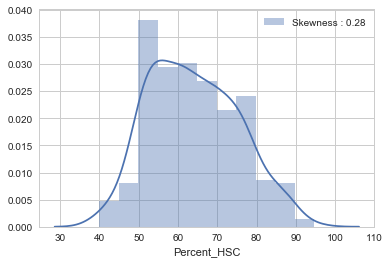

In [265]:
g = sns.distplot(train["Percent_HSC"],color="b",label="Skewness : %.2f"%(train.Percent_HSC.skew()))
g = g.legend(loc="best")

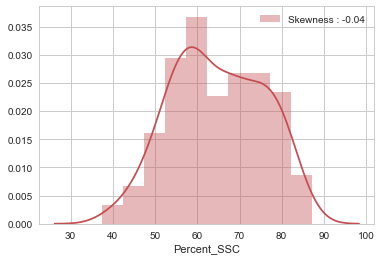

In [266]:
g = sns.distplot(train["Percent_SSC"],color="r",label="Skewness : %.2f"%(train.Percent_SSC.skew()))
g = g.legend(loc="best")

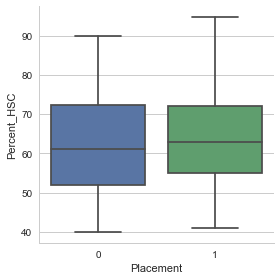

In [267]:
g = sns.factorplot(y="Percent_HSC",x="Placement",data=train,kind="box")
## Since the inter qurtile range is more in case of Male gender thus showing more deviation and that is why 
#we cannot take mean for our analysis as it will be baised towards right. 

In [268]:
train.loc[(train.Stream_HSC.isnull()) | (train.Course_Degree.isnull())]

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
10,11,0,79.6,Others,87.00,ISC,Commerce,72.35,NaN,0
12,13,1,60.0,Others,52.80,Others,NaN,73.25,Computer Applications,1
33,34,0,75.0,Others,77.00,Others,NaN,73.00,Management,1
44,45,1,54.0,Others,60.00,Others,Commerce,60.00,NaN,1
60,61,0,75.0,CBSE,58.00,CBSE,NaN,69.00,Science,1
89,90,1,77.0,Others,65.00,Others,NaN,70.00,Science,1
100,101,1,44.6,CBSE,60.58,Others,Science,68.11,NaN,1


In [269]:
train.Course_Degree.unique()

array(['Science', 'Computer Applications', 'Engineering', 'Management',
       'Commerce', 'Others', nan, 'Arts'], dtype=object)

In [270]:
#train.Course_Degree = train.Course_Degree.map({"Science":1,"Computer Applications":2,"Engineering":3,"Management":4,"Commerce":5,"Others":6,"Arts":7,np.nan:8})

In [271]:
#g = sns.heatmap(train[["Board_HSC","Board_SSC","Gender","Stream_HSC","Percent_HSC","Percent_SSC","Course_Degree"]].corr(),annot=True,cmap="coolwarm")

In [272]:
train.Course_Degree = train.Course_Degree.fillna('Missing')

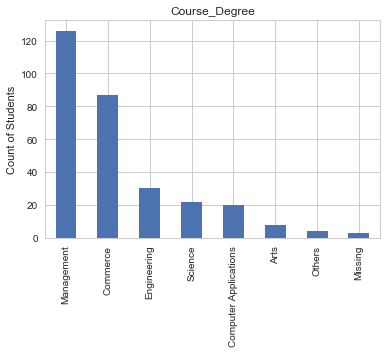

In [273]:
### lets look into the bar plot for the categorical columns ###
fig = train['Course_Degree'].value_counts().plot.bar()
fig.set_title('Course_Degree')
fig.set_ylabel('Count of Students')

In [274]:
print(train.Course_Degree.value_counts())
print(train.Course_Degree.unique()
     )

Management               126
Commerce                  87
Engineering               30
Science                   22
Computer Applications     20
Arts                       8
Others                     4
Missing                    3
Name: Course_Degree, dtype: int64
['Science' 'Computer Applications' 'Engineering' 'Management' 'Commerce'
 'Others' 'Missing' 'Arts']


In [275]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
Student No        300 non-null int64
Gender            300 non-null int64
Percent_SSC       300 non-null float64
Board_SSC         300 non-null object
Percent_HSC       300 non-null float64
Board_HSC         300 non-null object
Stream_HSC        296 non-null object
Percent_Degree    300 non-null float64
Course_Degree     300 non-null object
Placement         300 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.5+ KB


In [276]:
print(train.Stream_HSC.unique())

['Commerce' 'Science' 'Arts' nan]


In [277]:
train.Stream_HSC = train.Stream_HSC.fillna('Missing')

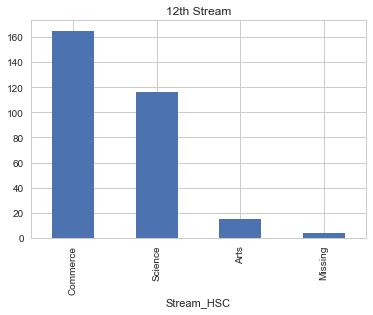

In [278]:
fig = train['Stream_HSC'].value_counts().plot.bar()
fig.set_title("12th Stream")
fig.set_xlabel("Stream_HSC")

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
Student No        300 non-null int64
Gender            300 non-null int64
Percent_SSC       300 non-null float64
Board_SSC         300 non-null object
Percent_HSC       300 non-null float64
Board_HSC         300 non-null object
Stream_HSC        300 non-null object
Percent_Degree    300 non-null float64
Course_Degree     300 non-null object
Placement         300 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.5+ KB


In [280]:
pd.crosstab(train.Gender,train.Stream_HSC)

Stream_HSC,Arts,Commerce,Missing,Science
Gender,,,,
0,8,47,2,34
1,7,118,2,82


In [281]:
pd.crosstab(train.Gender,train.Course_Degree)

Course_Degree,Arts,Commerce,Computer Applications,Engineering,Management,Missing,Others,Science
Gender,,,,,,,,
0,5,24,6,8,40,1,1,6
1,3,63,14,22,86,2,3,16


In [282]:
pd.pivot_table(train,index=["Gender","Stream_HSC","Course_Degree","Board_SSC","Board_HSC","Placement"])

Percent_Degree  \
Gender Stream_HSC Course_Degree         Board_SSC Board_HSC Placement                   
0      Arts       Arts                  ICSE      ISC       1               50.000000   
                                        Others    Others    0               54.000000   
                                                            1               38.000000   
                  Management            CBSE      CBSE      1               63.500000   
                                        ICSE      ISC       1               65.300000   
                                        Others    CBSE      1               67.930000   
                                                  Others    1               70.000000   
       Commerce   Arts                  CBSE      CBSE      0               42.000000   
                  Commerce              CBSE      CBSE      0               55.305000   
                                                            1               56.333333   
                                                  Others    1               75.000000   
                                        ICSE      ISC       1               60.783333   
                                                  Others    0               67.800000   
                                                            1               74.125000   
                                        Others    CBSE      1               50.200000   
                                                  Others    0               70.000000   
                                                            1               68.800000   
                  Computer Applications CBSE      CBSE      1               78.700000   
                  Management            CBSE      CBSE      1               69.533333   
                                                  Others    0               51.000000   
                                        ICSE      ISC       1               74.550000   
                                                  Others    0               80.000000   
                                                            1               76.000000   
                                        Others    Others    0               67.433333   
                                                            1               69.533333   
                  Missing               Others    ISC       0               72.350000   
       Missing    Management            Others    Others    1               73.000000   
                  Science               CBSE      CBSE      1               69.000000   
       Science    Arts                  Others    Others    1               56.000000   
                  Computer Applications CBSE      CBSE      1               72.000000   
                                                  ISC       1               68.000000   
                                        Others    CBSE      1               82.000000   
                                                  Others    0               63.000000   
                                                            1               65.000000   
                  Engineering           CBSE      CBSE      1               59.600000   
                                        ICSE      Others    1               65.600000   
                                        Others    Others    0               55.500000   
                                                            1               69.182500   
                  Management            CBSE      CBSE      1               66.133333   
                                                  Others    1               67.666667   
                                        ICSE      Others    1               57.400000   
                                        Others    Others    0               71.600000   
                                                            1               63.940000   
                  Others                Others    Others    1     

In [283]:
train.Stream_HSC.value_counts()

Commerce    165
Science     116
Arts         15
Missing       4
Name: Stream_HSC, dtype: int64

In [284]:
train.Course_Degree.value_counts()

Management               126
Commerce                  87
Engineering               30
Science                   22
Computer Applications     20
Arts                       8
Others                     4
Missing                    3
Name: Course_Degree, dtype: int64

In [285]:
train["Course_Degree_SUB"] = train.Course_Degree.map({"Science":1,"Computer Applications":2,"Engineering":3,"Management":4,"Commerce":5,"Others":6,"Arts":7,"Missing":8})
list(train["Course_Degree_SUB"][train.Course_Degree_SUB == 8].index)

[10, 44, 100]

In [286]:
stats.mode(train["Course_Degree_SUB"])

ModeResult(mode=array([4], dtype=int64), count=array([126]))

In [287]:
## Missing Value imputation for Course Degree ###
## Stream HSC is generally the steping stone for deciding the Course in Bachelor's and also taking in consideration the 
## Gender of the candidate for decideing the Course_Degree.

index_Miss_Course = list(train["Course_Degree_SUB"][train.Course_Degree_SUB == 8].index)
print(index_Miss_Course)
for i in index_Miss_Course:
    courseMode = stats.mode(train["Course_Degree_SUB"])[0][0]
    coursePredMode = stats.mode(train["Course_Degree_SUB"][((train['Stream_HSC']==train.iloc[i]["Stream_HSC"]) & (train['Gender'] == train.iloc[i]["Gender"]))])[0][0]
    if coursePredMode == 8:
        train['Course_Degree_SUB'].iloc[i] = coursePredMode
    else:
        train['Course_Degree_SUB'].iloc[i] = courseMode
    

[10, 44, 100]


In [288]:
stats.mode(train["Course_Degree_SUB"][((train['Stream_HSC']==train.iloc[100]["Stream_HSC"]) & (train['Gender'] == train.iloc[100]["Gender"]))])[0][0]


4

In [289]:
train["Stream_HSC_SUB"] = train.Stream_HSC.map({"Commerce":2,"Science":1,"Arts":3,"Missing":4})
train.Stream_HSC_SUB.value_counts()

2    165
1    116
3     15
4      4
Name: Stream_HSC_SUB, dtype: int64

In [290]:
index_Miss_Stream = list(train["Stream_HSC"][train.Stream_HSC_SUB == 4].index)
print(index_Miss_Stream)

for i in index_Miss_Stream:
    courseMode = stats.mode(train["Stream_HSC_SUB"])[0][0]
    coursePredMode = stats.mode(train["Stream_HSC_SUB"][((train['Course_Degree']==train.iloc[i]["Course_Degree"]) & (train['Gender'] == train.iloc[i]["Gender"]))])[0][0]
    if coursePredMode == 4:
        train['Stream_HSC_SUB'].iloc[i] = coursePredMode
    else:
        train['Stream_HSC_SUB'].iloc[i] = courseMode
    

[12, 33, 60, 89]


In [291]:
train.Stream_HSC_SUB.iloc[12]

2

In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
Student No           300 non-null int64
Gender               300 non-null int64
Percent_SSC          300 non-null float64
Board_SSC            300 non-null object
Percent_HSC          300 non-null float64
Board_HSC            300 non-null object
Stream_HSC           300 non-null object
Percent_Degree       300 non-null float64
Course_Degree        300 non-null object
Placement            300 non-null int64
Course_Degree_SUB    300 non-null int64
Stream_HSC_SUB       300 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 28.2+ KB


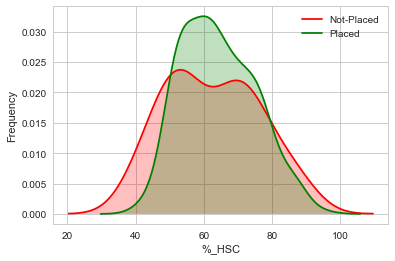

In [295]:
## HSC with placement ##
g = sns.kdeplot(train["Percent_HSC"][train["Placement"] == 0],color="Red",shade=True)
g = sns.kdeplot(train["Percent_HSC"][train["Placement"] == 1],ax=g,color="Green",shade=True)
g.set_xlabel("%_HSC")
g.set_ylabel("Frequency")
g = g.legend(["Not-Placed","Placed"])

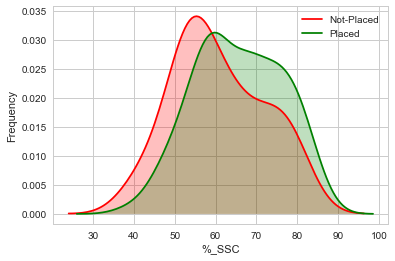

In [296]:
## SSC with placement ##
g = sns.kdeplot(train["Percent_SSC"][train["Placement"] == 0],color="Red",shade=True)
g = sns.kdeplot(train["Percent_SSC"][train["Placement"] == 1],ax=g,color="Green",shade=True)
g.set_xlabel("%_SSC")
g.set_ylabel("Frequency")
g = g.legend(["Not-Placed","Placed"])

In [302]:
### Label En-coding for the catagorical variables ###
train["Board_SSC_SUB"] = train.Board_SSC.map({"Others":3,"ICSE":2,"CBSE":1})
train["Board_HSC_SUB"] = train.Board_HSC.map({"CBSE":1,"ISC":2,"Others":3})

In [303]:
train.head(10)

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement,Course_Degree_SUB,Stream_HSC_SUB,Board_SSC_SUB,Board_HSC_SUB
0,1,1,62.00,Others,88.00,Others,Commerce,52.00,Science,1,1,2,3,3
1,2,1,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,2,1,2,3
2,3,1,72.00,Others,78.00,Others,Commerce,66.63,Engineering,1,3,2,3,3
3,4,1,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,1,4,3,1,1
4,5,1,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,3,1,1,2
5,6,1,55.00,ICSE,64.00,CBSE,Commerce,50.00,Commerce,1,5,2,2,1
6,7,0,70.00,Others,54.00,Others,Science,65.00,Others,1,6,1,3,3
7,8,1,68.00,ICSE,77.00,ISC,Commerce,72.50,Management,1,4,2,2,2
8,9,1,82.80,CBSE,70.60,CBSE,Commerce,69.30,Commerce,1,5,2,1,1
9,10,0,59.00,CBSE,74.00,CBSE,Arts,59.00,Management,1,4,3,1,1


In [317]:
### Import algorithmns ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold,learning_curve


In [312]:
train.columns

Index(['Student No', 'Gender', 'Percent_SSC', 'Board_SSC', 'Percent_HSC',
       'Board_HSC', 'Stream_HSC', 'Percent_Degree', 'Course_Degree',
       'Placement', 'Course_Degree_SUB', 'Stream_HSC_SUB', 'Board_SSC_SUB',
       'Board_HSC_SUB'],
      dtype='object')

In [313]:
Y = train.Placement
X_train,X_test,Y_train,Y_test = train_test_split(train[["Gender","Percent_SSC","Percent_HSC","Percent_Degree","Course_Degree_SUB","Stream_HSC_SUB","Board_SSC_SUB","Board_HSC_SUB"]],Y,test_size=0.3)
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(210, 8) (210,)
(90, 8) (90,)


In [314]:
## Comparing 3 popular classifier and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.
kfold = StratifiedKFold(n_splits=10)

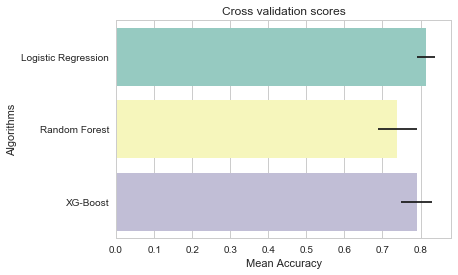

In [319]:
## Testing Different Algorithms ##
random_Seed = 2
classifiers = []
classifiers.append(LogisticRegression(random_state=random_Seed))
classifiers.append(RandomForestClassifier(random_state=random_Seed))
classifiers.append(XGBClassifier(random_state=random_Seed))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=Y_train,scoring="accuracy",cv=kfold,n_jobs=4))

cv_means = []
cv_std = [] 

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Cross_Validation_Mean":cv_means,"Cross_Validation_Error":cv_std,"Algorithms":["Logistic Regression",
                                                                                                      "Random Forest","XG-Boost"]})
g = sns.barplot("Cross_Validation_Mean","Algorithms",data=cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [320]:
## Hyper parameter tunning for above Models ##
## Preforming Grid Search Optimization for the algorithms ##

In [329]:
### Random Forest Tunning ###
RFC = RandomForestClassifier()
## Searching Grid for optimal parameter ##
rf_param_grid = {
    "max_depth":[None],
    "max_features":[1,3,8],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    "bootstrap":[False],
    "n_estimators":[100,300],
    "criterion":["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   54.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


0.81904761904761902

In [339]:
#### Logistic Regression ####
logistic = LogisticRegression()
# penalty = ['l1','l2']
# C = np.logspace(0,4,10)
hyperparameters = {"C":[0.001,0.01,0.1,1,10,100],"penalty":['l1','l2']}
clf = GridSearchCV(logistic,param_grid=hyperparameters,cv=kfold,n_jobs = 4,verbose=1)
clf.fit(X_train,Y_train)

# View best hyperparameters
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])
print('Best Score :',clf.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Penalty: l1
Best C: 0.001
Best Score : 0.819047619048


[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:   15.8s finished


In [366]:
#### XG_Boost ####
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Placement'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Placement'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Placement'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Placement'], dtrain_predprob))
                    
    from xgboost import plot_importance
    from matplotlib import pyplot
    plot_importance(alg)
    pyplot.show()


Model Report
Accuracy : 0.8833
AUC Score (Train): 0.946640


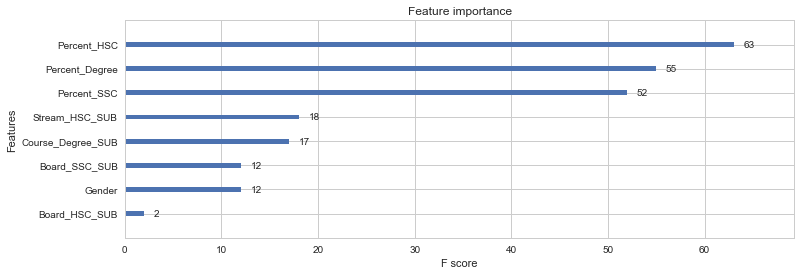

In [367]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)



In [375]:
param_test1 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train['Placement'])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.62240, std: 0.05146, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.59800, std: 0.04095, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.60120, std: 0.06839, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.63480, std: 0.05862, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.61280, std: 0.03037, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.59520, std: 0.07555, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.62760, std: 0.05384, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.61400, std: 0.03562, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.59520, std: 0.07555, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.62440, std: 0.05254, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.61400, std: 0.03562, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.59520, std: 0.07555, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [379]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train['Placement'])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.60640, std: 0.07126, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.59240, std: 0.07584, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.60920, std: 0.06152, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.61200, std: 0.06476, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.59520, std: 0.07555, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.60920, std: 0.06152, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.61200, std: 0.06476, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.59520, std: 0.07555, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.60920, std: 0.06152, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 4},
 0.612)

In [380]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train['Placement'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)


Model Report
Accuracy : 0.8767
AUC Score (Train): 0.925200


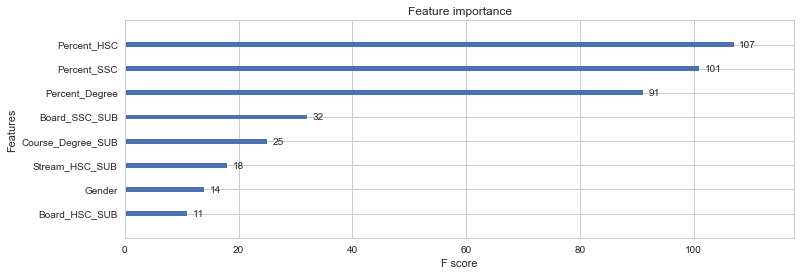

([mean: 0.60920, std: 0.06152, params: {'min_child_weight': 6},
  mean: 0.63100, std: 0.07159, params: {'min_child_weight': 8},
  mean: 0.63660, std: 0.07296, params: {'min_child_weight': 10},
  mean: 0.63920, std: 0.07238, params: {'min_child_weight': 12}],
 {'min_child_weight': 12},
 0.6392)

In [381]:
modelfit(gsearch2.best_estimator_, train, predictors)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


In [382]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train['Placement'])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.60920, std: 0.06152, params: {'gamma': 0.0},
  mean: 0.61060, std: 0.06372, params: {'gamma': 0.1},
  mean: 0.60720, std: 0.06371, params: {'gamma': 0.2},
  mean: 0.60480, std: 0.06910, params: {'gamma': 0.3},
  mean: 0.60520, std: 0.06170, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.6105999999999999)


Model Report
Accuracy : 0.85
AUC Score (Train): 0.862120


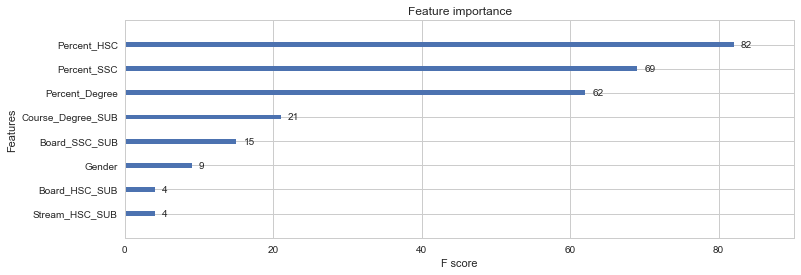

In [383]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [384]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train['Placement'])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.61840, std: 0.07052, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.60920, std: 0.05967, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.60540, std: 0.06535, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.58600, std: 0.05519, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.63080, std: 0.07195, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.61320, std: 0.06475, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.61060, std: 0.06854, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.58100, std: 0.06833, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.63200, std: 0.06948, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.60860, std: 0.06630, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.60560, std: 0.06838, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.58640, std: 0.05636, params: {'colsample_bytree': 0.8, 'subsample'

In [385]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train['Placement'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=177,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [387]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train['Placement'])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.60500, std: 0.06700, params: {'reg_alpha': 1e-05},
  mean: 0.60880, std: 0.07072, params: {'reg_alpha': 0.01},
  mean: 0.60520, std: 0.07391, params: {'reg_alpha': 0.1},
  mean: 0.60040, std: 0.06546, params: {'reg_alpha': 1},
  mean: 0.50000, std: 0.00000, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.01},
 0.6087999999999999)

In [388]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train['Placement'])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.60500, std: 0.06700, params: {'reg_alpha': 0},
  mean: 0.60500, std: 0.06700, params: {'reg_alpha': 0.001},
  mean: 0.60120, std: 0.07157, params: {'reg_alpha': 0.005},
  mean: 0.60880, std: 0.07072, params: {'reg_alpha': 0.01},
  mean: 0.60660, std: 0.07319, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.01},
 0.6087999999999999)


Model Report
Accuracy : 0.85
AUC Score (Train): 0.853880


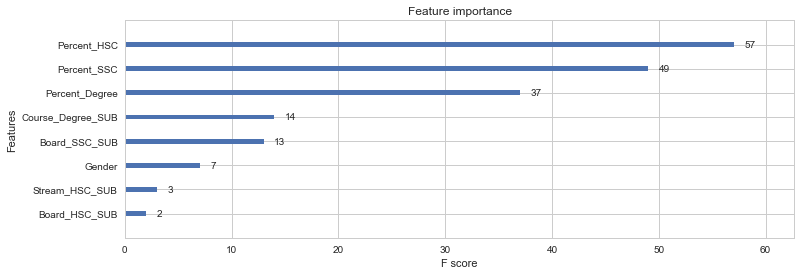

In [389]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)


Model Report
Accuracy : 0.8333
AUC Score (Train): 0.783520


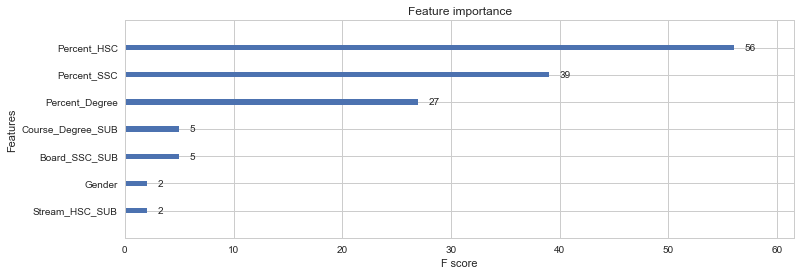

In [390]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

In [368]:
#### Ploting learning Curve ####
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

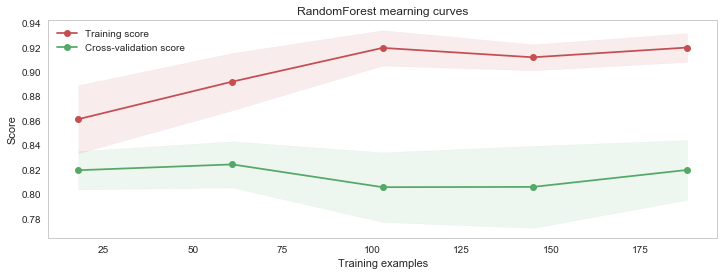

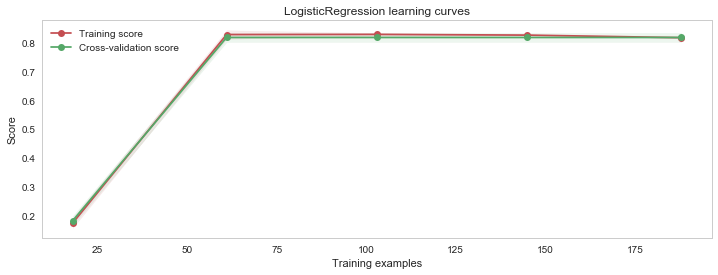

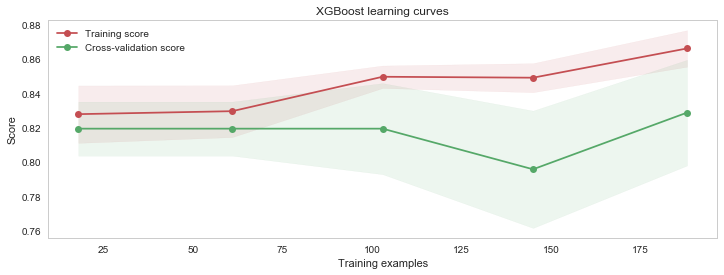

In [392]:
g = plot_learning_curve(gsRFC.best_estimator_,"RandomForest mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(clf.best_estimator_,"LogisticRegression learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsearch2.best_estimator_,"XGBoost learning curves",X_train,Y_train,cv=kfold)


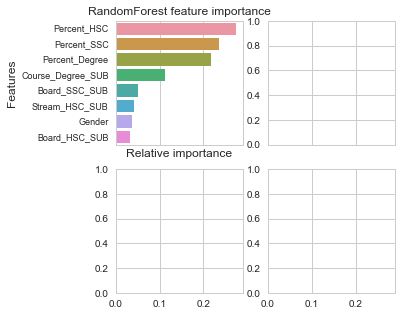

In [412]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,5))

names_classifiers = [("RandomForest",RFC_best)]

nclassifier = 0
for row in range(1):
    for col in range(1):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 0

In [416]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('logistic',clf.best_estimator_),('xgboost',gsearch2.best_estimator_)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

<bound method ClassifierMixin.score of VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_es...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8))],
         n_jobs=4, voting='soft', weights=None)>